# Task 1: Vector Computation

In [174]:
import sys
import os
import math
import json

class Point:
    def __init__(self,x,y):
        self.lon = x
        self.lat = y
        
class Polyline:
    def __init__(self, points = []):
        self.points = points
        
    def getLength(self): # Euclidean distance
        Length = 0.0
        for i in range(len(self.points)-1):
            Length += math.sqrt((self.points[i+1].lon-self.points[i].lon)**2 +(self.points[i+1].lat-self.points[i].lat)**2)
        return Length

class Polygon:
    def __init__(self, points = []):
        self.points = points
        
    def getArea(self):
        # Implement the method here
        Area = 0
        print("caculate the area of a polygon")
        self.pt_count = len(self.points)
        for i in range(self.pt_count-1):
            Area += ((self.points[i+1].lon-self.points[i].lon)*(self.points[i+1].lat+self.points[i].lat)/2)
        return Area
    
    def getCentroid(self):
        # Implement the method here
        print("get the centroid of a polygon")
        area = 0
        x_numer = 0
        y_numer = 0
        for i in range(self.pt_count-1):
            area += (self.points[i+1].lon*self.points[i].lat-self.points[i].lon*self.points[i+1].lat)
            x_numer += (self.points[i+1].lon+self.points[i].lon)*(self.points[i+1].lon*self.points[i].lat-self.points[i].lon*self.points[i+1].lat)
            y_numer += (self.points[i+1].lat+self.points[i].lat)*(self.points[i+1].lon*self.points[i].lat-self.points[i].lon*self.points[i+1].lat)
        denom = 6*area/2
        x_centro = round(x_numer/denom, 2)
        y_centro = round(y_numer/denom, 2)
        return x_centro, y_centro
        
    def getEnvelop(self):
        # Implement the method here
        print("get the minumum bounding envelop of a polygon")
        ptx = []
        pty = []
        for i in range(self.pt_count-1):
            ptx.append(self.points[i].lon)
            pty.append(self.points[i].lat)
        bound_rt = max(ptx)
        bound_lt = min(ptx)
        bound_up = max(pty)
        bound_dn = min(pty)
        print("upper boundary: %s\nlower boundary: %s\nright boundary: %s\nleft  boundary: %s"% (bound_up,bound_dn,bound_rt,bound_lt))
        return bound_rt, bound_lt, bound_up, bound_dn
        
        
if __name__ == "__main__":
    pointA=Point(0, 0)
    pointB=Point(3, 0)
    pointC=Point(3, 4)
    line= Polyline([pointA,pointB,pointC])
    print ("length: ", line.getLength())
    polygon = Polygon([pointA,pointB,pointC,pointA])
    area = polygon.getArea()
    if area<0:
        print ("Area: ",str(area)+".", "(Points order is counter-clockwise)")
    elif area==0:
        print ("Area: ", area)
    else:
        print ("Area: ",str(area)+".", "Points order is clockwise.")
    centro = polygon.getCentroid()
    print(centro)
    bounda = polygon.getEnvelop()
    

length:  7.0
caculate the area of a polygon
Area:  -6.0. (Points order is counter-clockwise)
get the centroid of a polygon
(2.0, 1.33)
get the minumum bounding envelop of a polygon
upper boundary: 4
lower boundary: 0
right boundary: 3
left  boundary: 0


# Task 2: Geometry Operation and Geodata Structure

In [175]:
from shapely.geometry import Point, MultiPoint, LineString, Polygon, shape
import json
import pylab
import numpy
import pandas as pd
import geopandas as gpd

In [176]:
# import packages
import flickrapi
import json
import pandas as pd
# create the API class
API_KEY = "e1d678195a28b55313f6babd78864ace"
API_SECRET = "d071c3199097d80f"
flickr = flickrapi.FlickrAPI(API_KEY, API_SECRET, cache=True)
# retrieve a set of photos within 1 km of Wisconsin State Capitol
id_collection = []
for j in range(2):
    photos = flickr.photos.search(lat=25.034, lon=121.5644, radius=32, tags="food", extras='url_c', max_taken_date='2022-01-01', page = 'j', format = 'json')
    photos = photos.decode()
    photos = json.loads(photos)
    # iterate photos in the photo set
    for i, photo_url in enumerate(photos['photos']['photo']):
        if i >= 500:
            break
        # get the photo url
        url = photo_url.get('url_c')
        pid = photo_url.get('id')
        if url is not None:
            id_collection.append(pid)
        
# prepare empty lists to collect data
lst_id = []
lst_lat = []
lst_lon = []
lst_tags = []
lst_takentime = []
lst_url = []
lst_userid = []
lst_username = []
lst_realname = []
lst_RegiLoc = []
lst_photosCount = []
## retrieve the information (json format) of the photo with id
for i in range(len(id_collection)):
    photo_info = flickr.photos.getInfo(photo_id=id_collection[i], format='json')
    # convert binary data to string 
    photo_info_d = photo_info.decode()
    # load photo information
    photo_info_l = json.loads(photo_info_d)
    #Get user information
    uid = photo_info_l['photo']['owner']['nsid']
    user_info = flickr.people.getInfo(user_id= uid, format='json')
    user_info_d = user_info.decode()
    user_info_l = json.loads(user_info_d)
    #put data into their corresponding containers
    lst_id.append(photo_info_l['photo']['id'])
    lst_lat.append(photo_info_l['photo']["location"]['latitude'])
    lst_lon.append(photo_info_l['photo']["location"]['longitude'])
    lst_tags.append(photo_info_l['photo']['tags']['tag'])
    lst_takentime.append(photo_info_l['photo']['dates']['taken'])
    lst_url.append(photo_info_l['photo']['urls']['url'][0]["_content"])
    lst_userid.append(photo_info_l['photo']['owner']['nsid'])
    lst_username.append(photo_info_l['photo']['owner']['username'])
    lst_realname.append(photo_info_l['photo']['owner']['realname'])
    lst_RegiLoc.append(photo_info_l['photo']['owner']['location'])
    lst_photosCount.append(user_info_l['person']['photos']['count']['_content'])
    
# dictionary of lists  
dict = {'Photo ID': lst_id, 'Latitude': lst_lat, 'Longitude': lst_lon, 'tags': lst_tags, 'taken time':lst_takentime, 'url':lst_url, 'user id':lst_userid, 'username':lst_username, 'realname':lst_realname, 'registered location':lst_RegiLoc, 'photos count':lst_photosCount}  
df = pd.DataFrame(dict)
# saving the dataframe
df.to_csv('500Photo_Lab6.csv', index = False) 

In [177]:
# Load 500 flickr photo data from a CSV file
df_fPhotos = pd.read_csv('500Photo_Lab6.csv')
# Convert CSV to GeoDataFrame
gdf_fPhotos = gpd.GeoDataFrame(data=df_fPhotos, geometry=gpd.points_from_xy(x=df_fPhotos.Longitude, y=df_fPhotos.Latitude))
gdf_fPhotos.head()

,Photo ID,Latitude,Longitude,tags,taken time,url,user id,username,realname,registered location,photos count,geometry
0,50311942621,25.043872,121.531300,"[{'id': '8951431-50311942621-7679', 'author': ...",2020-08-04 18:17:17,https://www.flickr.com/photos/sfmine79/5031194...,8996753@N06,MiNe (sfmine79),MiNe,"Taipei, Taiwan",52125,POINT (121.53130 25.04387)
1,50312117152,25.048450,121.533194,"[{'id': '8951431-50312117152-7679', 'author': ...",2020-08-14 12:06:09,https://www.flickr.com/photos/sfmine79/5031211...,8996753@N06,MiNe (sfmine79),MiNe,"Taipei, Taiwan",52125,POINT (121.53319 25.04845)
2,50311942116,25.071888,121.519077,"[{'id': '8951431-50311942116-7679', 'author': ...",2020-08-23 18:47:54,https://www.flickr.com/photos/sfmine79/5031194...,8996753@N06,MiNe (sfmine79),MiNe,"Taipei, Taiwan",52125,POINT (121.51908 25.07189)
3,50311274988,25.053025,121.547961,"[{'id': '8951431-50311274988-7679', 'author': ...",2020-08-25 15:38:28,https://www.flickr.com/photos/sfmine79/5031127...,8996753@N06,MiNe (sfmine79),MiNe,"Taipei, Taiwan",52125,POINT (121.54796 25.05303)
4,50195907392,25.037530,121.566844,"[{'id': '8951431-50195907392-7679', 'author': ...",2020-07-11 20:00:03,https://www.flickr.com/photos/sfmine79/5019590...,8996753@N06,MiNe (sfmine79),MiNe,"Taipei, Taiwan",52125,POINT (121.56684 25.03753)


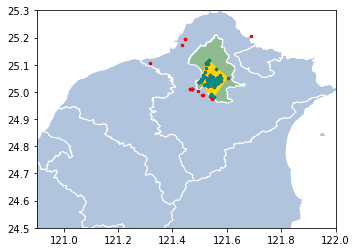

In [178]:
# format wanted polygons and conbine point sets
point_collection = []
gdf_fPhotos = gdf_fPhotos.set_crs('epsg:3824')
# read 2 map shapefile
gdf_tw_base = gpd.read_file("COUNTY_MOI_1090820.shp")
gdf_tw_tpe = gpd.read_file("TaipeiCity.shp")
for index, row in gdf_fPhotos.iterrows():
    p = row['geometry']
    if gdf_tw_tpe.contains(p)[0] == True:
        point_collection.append(p)
city_col = []
lat_col = []
lng_col = []
count = len(point_collection)
for i in range(count):
    lng_col.append(point_collection[i].x)
    lat_col.append(point_collection[i].y)
    city_col.append("Taipei")
dict = {'city': city_col, 'lng':lng_col, 'lat':lat_col}  
df_tpe_contain = pd.DataFrame(dict)
# create a convex hull for points inside Taipei City.
# differentiate points inside Taipei City and outside Taipei City
gdf_tpe_contain = gpd.GeoDataFrame(data=df_tpe_contain, geometry=gpd.points_from_xy(x=df_tpe_contain.lng, y=df_tpe_contain.lat))
tpe_contain_diss = gdf_tpe_contain.dissolve(by='city')
tpe_contain_convexHull = tpe_contain_diss.convex_hull
tw_base = gdf_tw_base.plot(color='lightsteelblue',edgecolor='white')
tw_tpe_mark = gdf_tw_tpe.plot(ax=tw_base, color='darkseagreen',edgecolor='white')
tpe_pt_area = tpe_contain_convexHull.plot(ax=tw_tpe_mark, color="gold")
all_pts_layer = gdf_fPhotos.plot(ax=tpe_pt_area, marker='o', color='r', markersize=5)
tpe_contain_diss.plot(ax=all_pts_layer, marker='o', color='darkcyan', markersize=5)
pylab.axis([120.90, 122, 24.50, 25.30])
pylab.show()

# Task 3: K-Means clustering

In [179]:
# Random number
import random
print(random.random(), random.randint(0, 100))
random.seed(100)
print(random.random(), random.randint(0, 5))

0.047887516459941715 82
0.1456692551041303 3


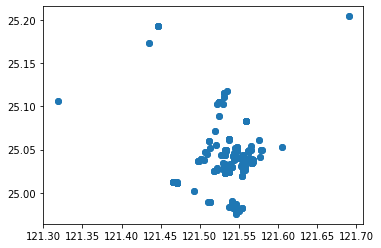

In [180]:
# Task 2 photo location points  
gdf_fPhotos.plot()
pylab.show()

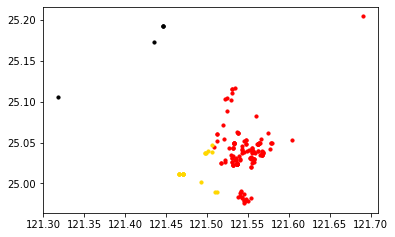

In [242]:
class K_Means:
    def __init__(self, k=5, max_iterations=10):
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = []
        self.data_class = {}
        
        for i in range(self.k):
            x_rand = random.randint(-180, 180)
            y_rand = random.randint(-90, 90)
            self.centroids.append((x_rand, y_rand))

    def fit(self, all_data): 
        for i in range(self.max_iterations):
            self.assignment(all_data)
            self.update()
        return self.data_class
    
    
    def assignment(self, all_data):
        count = len(all_data)
        num = 0
        for i in range(count):
            data = (all_data[i].x, all_data[i].y)
            # calculate distance between features and centroids.
            # Then assign each feature to its nearest centroid.
            dis_min = 100000 # set a large number
            for i in range(self.k):
                distance = math.sqrt((data[0]-self.centroids[i][0])**2 +(data[1]-self.centroids[i][1])**2)
                if distance < dis_min:
                    dis_min = min(distance, dis_min)
                    self.data_class[data] = i
                else:
                    continue

    def update(self):
        dict = self.data_class #lots of (x,y) = j
        new_x = []
        new_y = []
        x_collection = []
        y_collection = []
        for i in range(self.k):
            x_collection.append([])
            y_collection.append([])
        for key in dict.keys():
            for i in range(self.k):
                new_x.append(key[0])
                new_y.append(key[1])
                if dict[key] == i:
                    x_collection[i].append(key[0])
                    y_collection[i].append(key[1])
            #key[0] => x coordinate in data
            #key[1] => y coordinate in data
        for i in range(self.k):
            # x_collection = [[all_x0], [all_x1], [all_x2].....]
            # y_collection = [[all_y0], [all_y1], [all_y2].....]
            if x_collection[i]==[] or y_collection[i]==[]:
                x_rand = random.uniform(min(new_x), max(new_x))
                y_rand = random.uniform(min(new_y), max(new_y))
                self.centroids[i] = (x_rand, y_rand)
                #print("Unused centroid %s has been updated" % (str(i)))
                #print("New centroid coord = %s" % (str(self.centroids[i])))
                #print("one round end")
            else:
                self.centroids[i] = (sum(x_collection[i]) / len(x_collection[i]), sum(y_collection[i]) / len(y_collection[i]))
                #print("centroid %s has been updated" % str(i))
                #print("New centroid coord = %s" % (str(self.centroids[i])))
                #print("one round end")
        
    

if __name__ == "__main__":
    cluster_num = 3
    pts = gdf_fPhotos['geometry']
    kmeans = K_Means(k=cluster_num ,max_iterations=10)
    #print(len(pts))
    class_dict = kmeans.fit(pts)
    coord_cluster = []
    for i in range(cluster_num):
        coord_cluster.append([])
    for key in class_dict.keys():
        for i in range(cluster_num):
            if class_dict[key] == i:
                coord_cluster[i].append(key)
    
    # 因為 k=2
    dict_lst = []
    for i in range(cluster_num):
        dict_lst.append({'lng':[], 'lat':[]})
    for i in range(cluster_num):
        for data in coord_cluster[i]:
            dict_lst[i]['lng'].append(data[0])
            dict_lst[i]['lat'].append(data[1])
    gdf_lst = []
    for i in range(cluster_num):
        df = dict_lst[i]
        gdf_cluster = gpd.GeoDataFrame(data=pd.DataFrame(df), geometry=gpd.points_from_xy(x=pd.DataFrame(df).lng, y=pd.DataFrame(df).lat))
        gdf_lst.append(gdf_cluster)
    color_lst = ['black', 'r', 'gold', 'g', 'b']
    # cluster 0 dots are in black.
    cluster_plot_0 = gdf_lst[0].plot(color=color_lst[0], markersize=10)
    # cluster 1 dots are in red.
    cluster_plot_1 = gdf_lst[1].plot(ax=cluster_plot_0, color=color_lst[1], markersize=10)
    # cluster 2 dots are in gold.
    cluster_plot_all= gdf_lst[i].plot(ax=cluster_plot_1, color=color_lst[2], markersize=10)
    pylab.show()

In [243]:
print(gdf_fPhotos['geometry'])

0      POINT (121.53130 25.04387)
1      POINT (121.53319 25.04845)
2      POINT (121.51908 25.07189)
3      POINT (121.54796 25.05303)
4      POINT (121.56684 25.03753)
                  ...            
495    POINT (121.54852 25.04010)
496    POINT (121.53695 25.02413)
497    POINT (121.55917 25.03733)
498    POINT (121.54290 25.04204)
499    POINT (121.54290 25.04204)
Name: geometry, Length: 500, dtype: geometry


# Task 4: scikit-learn

## K-means clustering 

In [244]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

### Setting No.1

In [245]:
# Store flickr GeoDataframe as a Pandas Dataframe
photo_df = pd.DataFrame(gdf_fPhotos)
# Build the K-Means Clustering Model
# K Means Cluster
coord_lst = []
df_count = len(photo_df)
for i in range(df_count):
    coord_lst.append([photo_df['Longitude'][i], photo_df['Latitude'][i]])
X = np.array(coord_lst)
model_1 = KMeans(n_clusters=3)
model_1.fit(X)
# This is the K-Means Clustering result
print(model_1.labels_)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 2 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 0 1 1 1 2 2 2 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 2 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1
 1 1 2 2 2 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0
 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 

Text(0.5, 1.0, 'K-Mean Clustering_1')

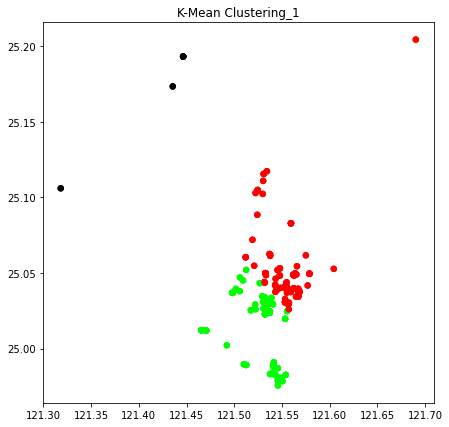

In [246]:
#Visualise the classifier results
# Set the size of the plot
plt.figure(figsize=(7,7))
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
plt.scatter(photo_df['Longitude'], photo_df['Latitude'], c=colormap[model_1.labels_], s=30)
plt.title('K-Mean Clustering_1')

### Setting No.2

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Text(0.5, 1.0, 'K-Mean Clustering_2')

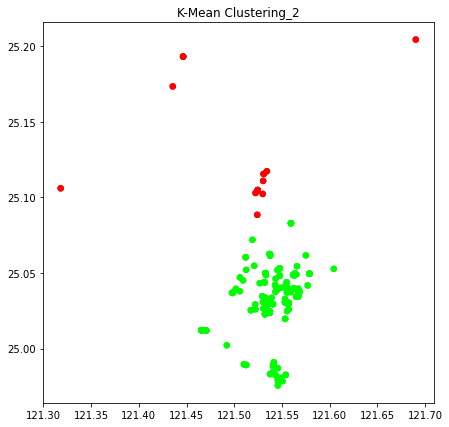

In [247]:
# Store flickr GeoDataframe as a Pandas Dataframe
photo_df = pd.DataFrame(gdf_fPhotos)
# Build the K-Means Clustering Model
# K Means Cluster
coord_lst = []
df_count = len(photo_df)
for i in range(df_count):
    coord_lst.append([photo_df['Longitude'][i], photo_df['Latitude'][i]])
X = np.array(coord_lst)
# parameter from setting_1 = 3 to this setting_2 = 5
model_2 = KMeans(n_clusters=2)
model_2.fit(X)
# This is the K-Means Clustering result
print(model_2.labels_)
#Visualise the classifier results
# Set the size of the plot
plt.figure(figsize=(7,7))
# Create a colormap
colormap = np.array(['red', 'lime', 'black', 'gold'])
plt.scatter(photo_df['Longitude'], photo_df['Latitude'], c=colormap[model_2.labels_], s=30)
plt.title('K-Mean Clustering_2')

## DBSCAN Clustering

In [248]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

Text(0.5, 1.0, 'DBSCAN Clustering')

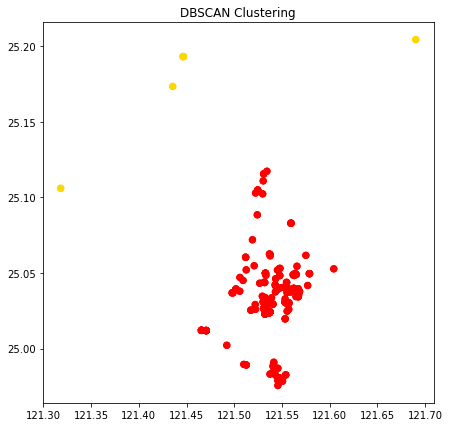

In [249]:
photo_df = pd.DataFrame(gdf_fPhotos)
coord_lst = []
df_count = len(photo_df)
for i in range(df_count):
    coord_lst.append([photo_df['Longitude'][i], photo_df['Latitude'][i]])
X = np.array(coord_lst)
# Compute DBSCAN
clustering = DBSCAN(eps=0.1, min_samples=10)
db=clustering.fit(X)
print(db.labels_) #Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
#Visualise the classifier results
# Set the size of the plot
plt.figure(figsize=(7,7))
# Create a colormap
colormap = np.array(['red',"lime",'black','gold'])
plt.scatter(photo_df['Longitude'], photo_df['Latitude'], c=colormap[db.labels_], s=40)
plt.title('DBSCAN Clustering')

## Rand Index

### K-Means Setting 1 vs DBSCAN

In [250]:
kmeans_result_1 = model_1.labels_.copy()
db_result = clustering.labels_.copy()
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(db_result, kmeans_result_1)

0.0786292766915151

### K-Means Setting 2 vs DBSCAN

In [251]:
kmeans_result = model_2.labels_.copy()
db_result = clustering.labels_.copy()
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(db_result, kmeans_result)

0.5058168623447027

Comment: It seems like my data distribution is not suitable for DBSCAN. The data coordinates are too close to each other, meaning that DBSCAN can sometimes have lots of overlap. Thus, when the number of clusters decreases in K-Means, the Rand Index would become higher because the K-Means result would be closer to the DBSCAN result.